#### Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Loading the Dataset

In [143]:
df=pd.read_csv("EV_dataset.csv")

In [144]:
##Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       86 non-null     int64  
 1   Brand            86 non-null     object 
 2   Model            86 non-null     object 
 3   AccelSec         86 non-null     float64
 4   TopSpeed_KmH     86 non-null     int64  
 5   Range_Km         86 non-null     int64  
 6   Efficiency_WhKm  86 non-null     int64  
 7   FastCharge_KmH   86 non-null     int64  
 8   RapidCharge      86 non-null     object 
 9   PowerTrain       86 non-null     object 
 10  PlugType         86 non-null     object 
 11  BodyStyle        86 non-null     object 
 12  Segment          86 non-null     object 
 13  Seats            86 non-null     int64  
 14  Price            86 non-null     float64
dtypes: float64(2), int64(6), object(7)
memory usage: 10.2+ KB


In [145]:
##descriptive summary of the dataset
df.describe()

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,Price
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,53.244186,7.897674,169.523256,310.174419,188.813953,398.953488,4.744186,4.704301e+06
std,30.097073,2.894985,31.630115,91.196129,26.753565,174.551722,0.689178,2.705370e+06
min,1.000000,2.800000,123.000000,95.000000,153.000000,170.000000,2.000000,1.856296e+06
25%,27.250000,6.050000,150.000000,250.000000,168.000000,230.000000,4.250000,3.082661e+06
50%,54.000000,7.500000,160.000000,330.000000,180.500000,385.000000,5.000000,3.725457e+06
75%,78.750000,9.375000,187.500000,378.750000,200.000000,507.500000,5.000000,5.505788e+06
max,102.000000,22.400000,260.000000,450.000000,273.000000,890.000000,7.000000,1.667162e+07


#### Data Preprocessing

In [146]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()

print("\nData after handling missing values (first 5 rows):")
print(df.head())


Missing values in each column:
Unnamed: 0         0
Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
Price              0
dtype: int64

Data after handling missing values (first 5 rows):
   Unnamed: 0        Brand      Model  AccelSec  TopSpeed_KmH  Range_Km  \
0           1  Volkswagen   ID.3 Pure      10.0           160       270   
1           2    Polestar           2       4.7           210       400   
2           3         BMW        iX3        6.8           180       360   
3           4       Honda          e        9.5           145       170   
4           6  Volkswagen     e-Golf        9.6           150       190   

   Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain    PlugType  \
0              167             250          No        RWD  Type 

In [147]:
df.shape

(86, 15)

In [148]:
##List down all the column names
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'Price'],
      dtype='object')

In [149]:
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['AccelSec'] = df['AccelSec'].astype('category')
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].astype('category')
df['Range_Km'] = df['Range_Km'].astype('category')
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].astype('category')
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype('category')
df['RapidCharge'] = df['RapidCharge'].astype('category')
df['PowerTrain'] = df['PowerTrain'].astype('category')
df['PlugType'] = df['PlugType'].astype('category')
df['BodyStyle'] = df['BodyStyle'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Seats'] = df['Seats'].astype('category')
df['Price'] = df['Price'].astype('category')

C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\2000816573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='TopSpeed_KmH', palette='husl', data=df)


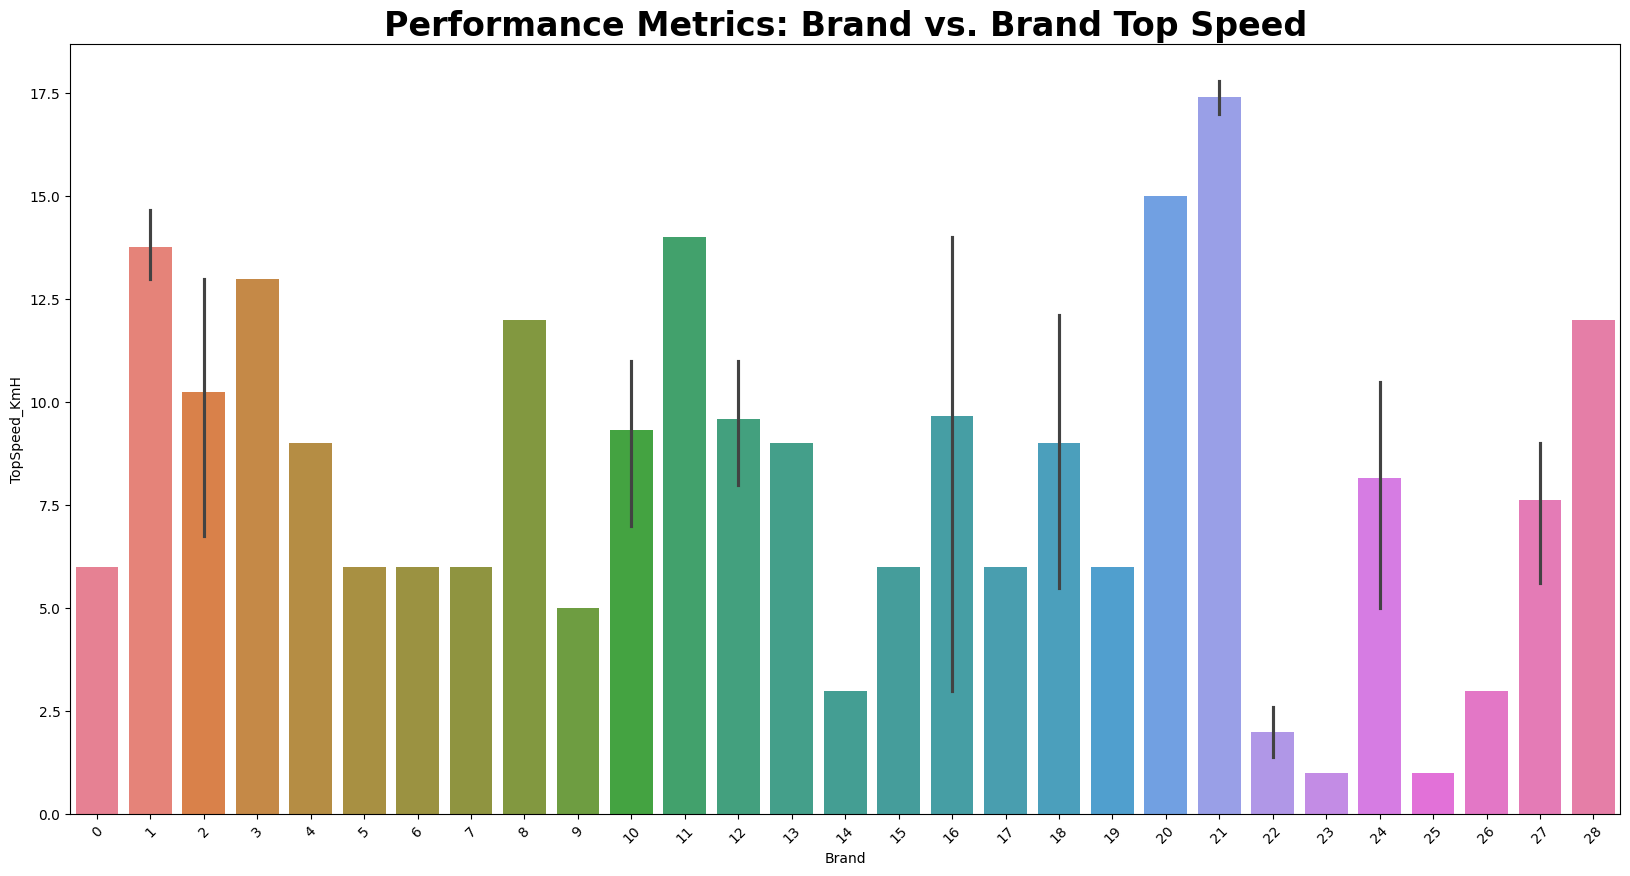

In [185]:

plt.figure(figsize=(20, 10))
plt.title("Performance Metrics: Brand vs. Brand Top Speed", fontsize=24, fontweight='bold', color='black')

# Creating the bar plot
sns.barplot(x='Brand', y='TopSpeed_KmH', palette='husl', data=df)
plt.xticks(rotation=45)

plt.show()


When looking at the bar chart of various car brands and their top speeds, it's clear that Porsche stands out with the highest speed among all the cars in the dataset. This suggests that Porsche really prioritizes performance.


C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\367642720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='Price',palette='rainbow',data=df)


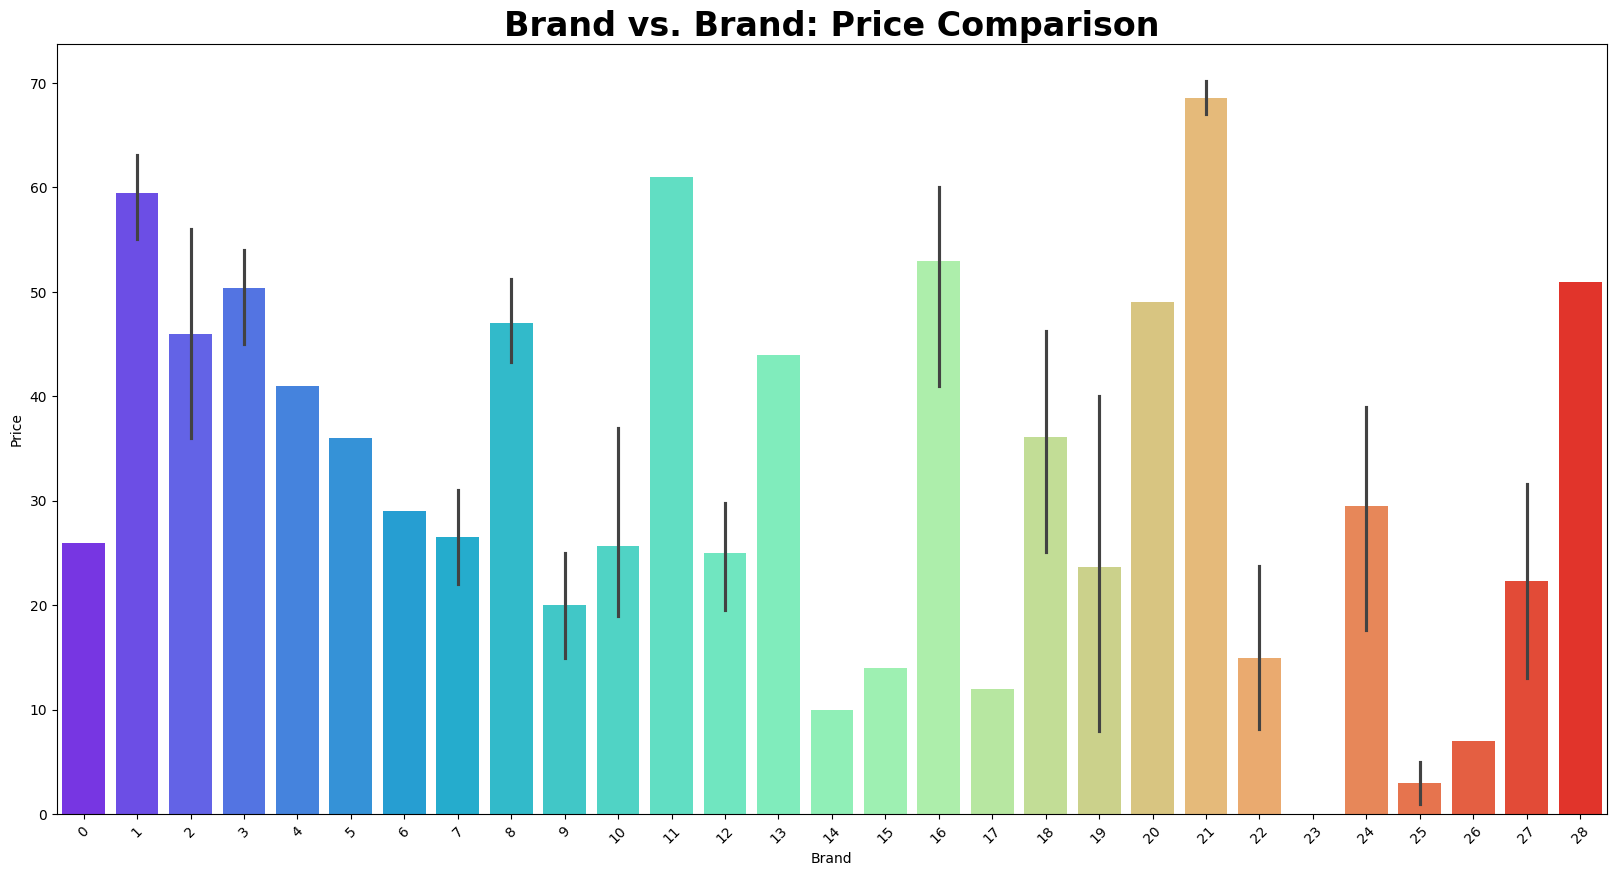

In [187]:
plt.figure(figsize=(20,10))
plt.title("Brand vs. Brand: Price Comparison", fontsize=24, fontweight='bold', color='black')

# Creating the bar plot
sns.barplot(x='Brand',y='Price',palette='rainbow',data=df)
plt.xticks(rotation=45)

plt.show()


When we look at the bar chart of car prices, it’s pretty obvious that Porsche is the priciest brand in the mix. This tells us that Porsche is really aiming for the luxury market, likely because they’re offering cars that are not just high-performing but also packed with premium features that justify the higher cost.


C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\4174902361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='Seats',data=df,palette='husl')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'MG '),
  Text(15, 0, 'Mazda '),
  Text(16, 0, 'Mercedes '),
  Text(17, 0, 'Mini '),
  Text(18, 0, 'Nissan '),
  Text(19, 0, 'Opel '),
  Text(20, 0, 'Polestar '),
  Text(21, 0, 'Porsche '),
  Text(22, 0, 'Renault '),
  Text(23, 0, 'SEAT '),
  Text(24, 0, 'Skoda '),
  Text(25, 0, 'Smart '),
  Text(26, 0, 'Sono '),
  Text(27, 0, 'Volkswagen '),
  Text(28, 0, 'Volvo ')])

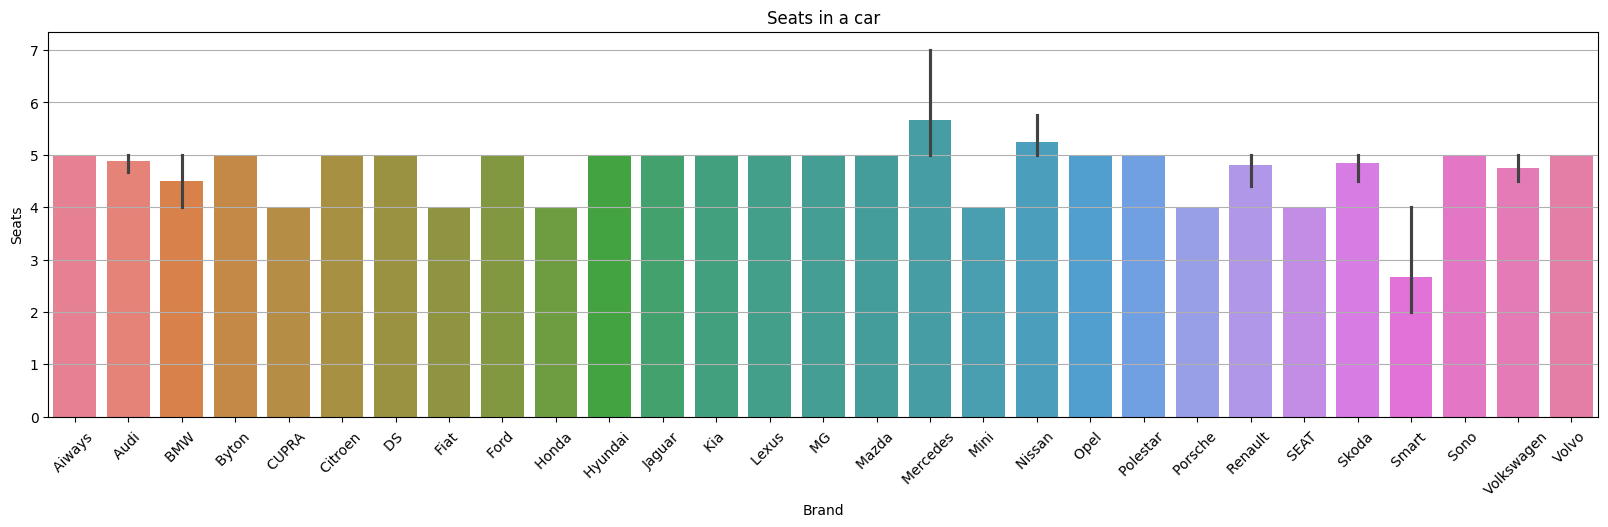

In [153]:
#Number of seats in each car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Plug Type')

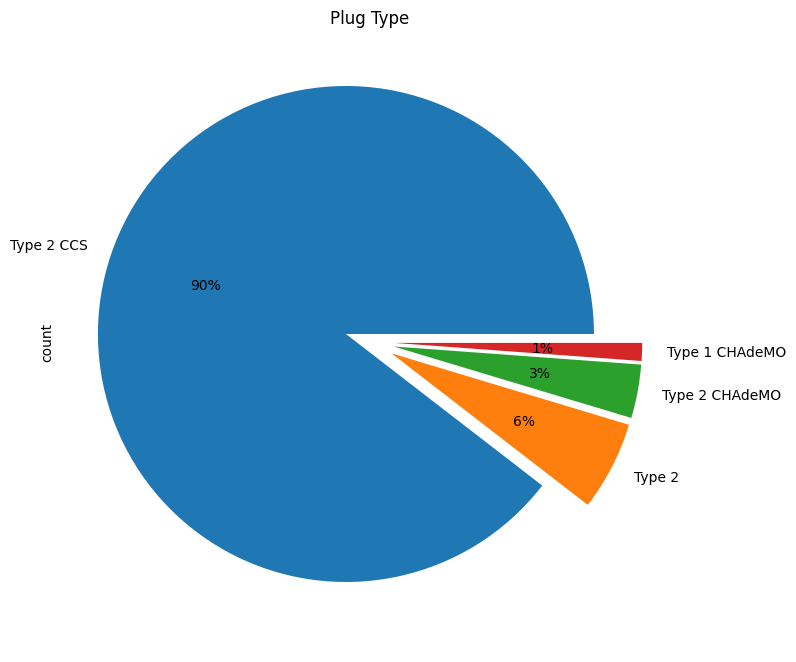

In [154]:
#Type of Plug used for charging
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

**Categorical Encoding:**

It is the process of converting categorical data into integer format.

In [155]:
df['Brand'] = df['Brand'].cat.codes
df['Model'] = df['Model'].cat.codes
df['AccelSec'] = df['AccelSec'].cat.codes
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].cat.codes
df['Range_Km'] = df['Range_Km'].cat.codes
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].cat.codes
df['FastCharge_KmH'] = df['FastCharge_KmH'].cat.codes
df['RapidCharge'] = df['RapidCharge'].cat.codes
df['PowerTrain'] = df['PowerTrain'].cat.codes
df['PlugType'] = df['PlugType'].cat.codes
df['BodyStyle'] = df['BodyStyle'].cat.codes
df['Segment'] = df['Segment'].cat.codes
df['Seats'] = df['Seats'].cat.codes
df['Price'] = df['Price'].cat.codes

In [156]:
df.dtypes

Unnamed: 0         int64
Brand               int8
Model               int8
AccelSec            int8
TopSpeed_KmH        int8
Range_Km            int8
Efficiency_WhKm     int8
FastCharge_KmH      int8
RapidCharge         int8
PowerTrain          int8
PlugType            int8
BodyStyle           int8
Segment             int8
Seats               int8
Price               int8
dtype: object

In [157]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Price']])

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Price'])

print("\nScaled data (first 5 rows):")
print(df_scaled.head())



Scaled data (first 5 rows):
   AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH     Price
0  0.730455     -0.302848 -0.443111        -0.820148       -0.858354 -0.720443
1 -1.111035      1.287196  0.990748        -0.293785        1.273794  0.186123
2 -0.381388      0.333170  0.549561         0.646151        0.928041  0.583860
3  0.556730     -0.779861 -1.546081        -0.782551       -1.204107 -0.617683
4  0.591475     -0.620857 -1.325487        -0.782551       -1.031231 -0.655297


#### Market Segmentation Using K-Means Clustering

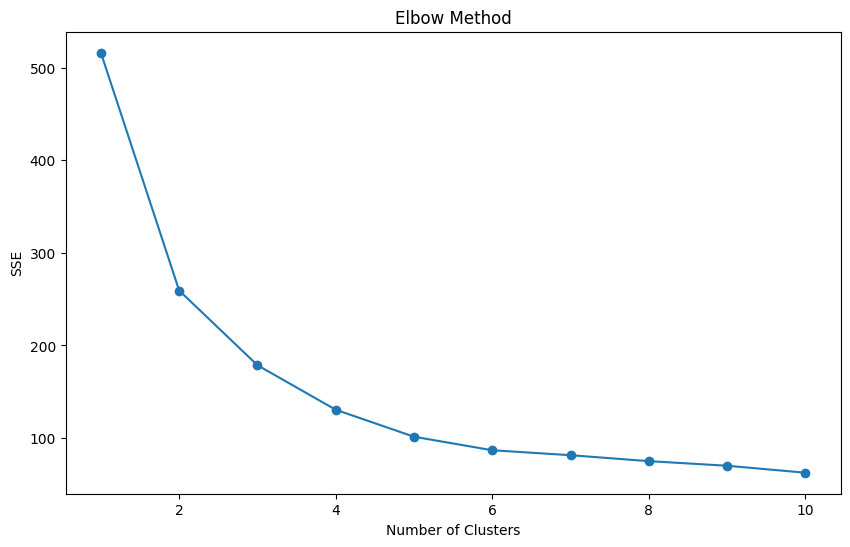

In [158]:
# Use the Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()





- X-axis (Number of Clusters): This shows how many clusters (groups) we're trying, from 1 to 10.
- Y-axis (SSE - Sum of Squared Errors): This measures how well the data fits into each cluster. Lower SSE means the clusters are tighter and more accurate.

Chart:
- Elbow Point:
  - Look for the "elbow" shape in the chart. This is where the curve starts to flatten out.
  - In this chart, the elbow is around 3 or 4 clusters. This means that adding more clusters beyond this point doesn’t really improve the fit much.
  
- SSE Reduction:
  - At first, the SSE drops a lot as you add more clusters, meaning more clusters are helping to make the groups better.
  - After hit around 3 or 4 clusters, the SSE doesn’t drop much more, showing that extra clusters don’t make a big difference.

In Simple Terms:
- Best Number of Clusters:
  - Based on this chart, 3 or 4 clusters seem to be the best choice. This number gives a good balance between making accurate groups and not making the model too complicated.


This explanation helps to understand why 3 or 4 clusters are likely the best choice for  data, making the grouping process both effective and efficient.

In [159]:
# Apply K-Means with the selected number of clusters
optimal_clusters = 4  # Assuming 4 clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Output the cluster assignments
print("\nCluster assignments (first 5 rows):")
print(df[['Model', 'Cluster']].head())

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_



Cluster assignments (first 5 rows):
   Model  Cluster
0     29        0
1      0        1
2     84        1
3     63        0
4     66        0


#### Analyzing Key Features
This step focuses on calculating and visualizing the average values of acceleration, range, and price within each cluster.

C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\399918865.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  key_features = df[['Cluster', 'AccelSec', 'Range_Km', 'Price']].groupby('Cluster').mean()


Mean values of key features by cluster:
          AccelSec   Range_Km      Price
Cluster                                 
0        33.750000  10.388889  17.444444
1        18.967742  31.774194  40.064516
2         1.833333  33.833333  68.500000
3        14.000000  26.923077  58.000000


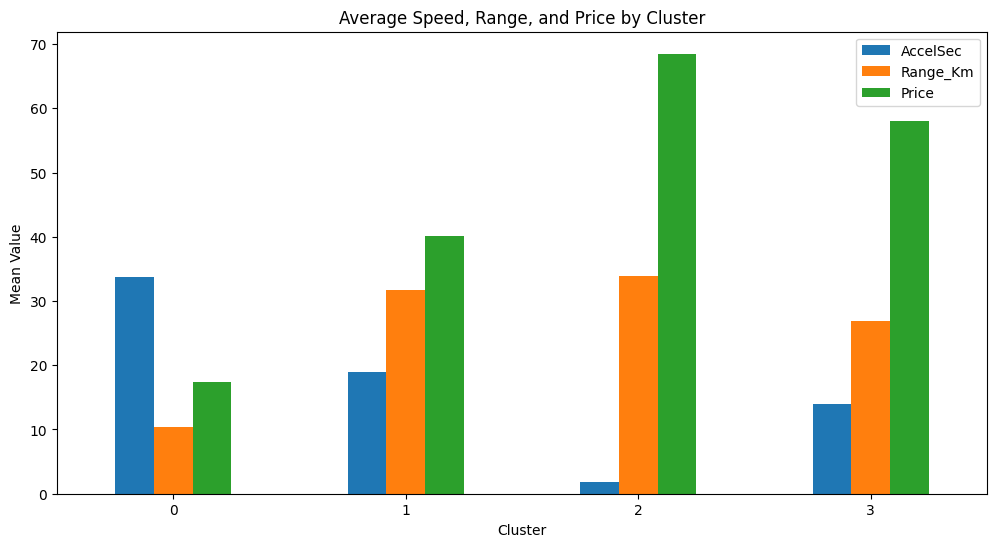

In [192]:

# Calculate mean values of key features by cluster
key_features = df[['Cluster', 'AccelSec', 'Range_Km', 'Price']].groupby('Cluster').mean()

# Display the mean values
print("Mean values of key features by cluster:")
print(key_features)

# Plot the mean values
key_features.plot(kind='bar', figsize=(12, 6))
plt.title('Average Speed, Range, and Price by Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()



#### Cluster Breakdown:

##### Cluster 0:
   - Acceleration Time (AccelSec): On average, these vehicles take around 30 seconds to accelerate, which is quite moderate.
   - Range (Range_Km): They offer the shortest range, averaging under 10 kilometers.
   - Price: These are the most budget-friendly, priced around ₹10 lakhs.

   Summary: Cluster 0 features the most affordable vehicles with moderate acceleration but a limited range.

##### Cluster 1:
   - **Acceleration Time (AccelSec):** These vehicles take a bit longer to accelerate, about 20 seconds.
   - **Range (Range_Km):** The range is better, averaging around 20 kilometers.
   - **Price:** They cost more than those in Cluster 0, around ₹40 lakhs.

   Summary: Cluster 1 offers a balance with improved performance and range at a higher price.

##### Cluster 2:
   - Acceleration Time (AccelSec): Vehicles in this cluster have the fastest acceleration, close to 0 seconds, meaning they can speed up very quickly.
   - Range (Range_Km): They have a good range, just above 20 kilometers.
   - Price: These are the priciest, averaging around ₹70 lakhs, suggesting they are high-end models.

   Summary: Cluster 2 includes premium vehicles with top-notch acceleration and the highest prices.

##### Cluster 3:
   - Acceleration Time (AccelSec): These vehicles accelerate in about 10 seconds, which is quicker than Cluster 1 but not as fast as Cluster 2.
   - Range (Range_Km): They have a decent range, around 25 kilometers.
   - Price:They are expensive but not the highest, priced just above ₹60 lakhs.

   Summary: Cluster 3 provides a good mix of performance and range at a high but not the highest price.

##### Overall Interpretation:

- Acceleration: Cluster 2 leads with the fastest acceleration, making these vehicles the sportiest. Cluster 0 has the slowest acceleration.
  
- Range: Cluster 3 offers the best range, ideal for longer trips, while Cluster 0 has the shortest range, which is suitable for short commutes.

- Price: As the price increases from Cluster 0 to Cluster 2, so do the features. Cluster 2’s higher price reflects its premium status with better performance and range.

#### In Summary:

The chart shows that if you’re looking for the best performance and are willing to pay more, Cluster 2 is your go-to. For those on a tighter budget but needing decent performance, Cluster 0 and Cluster 1 are better choices. Cluster 3 provides a good middle ground, offering a balance of performance and price.

####  Principal Component Analysis (PCA)

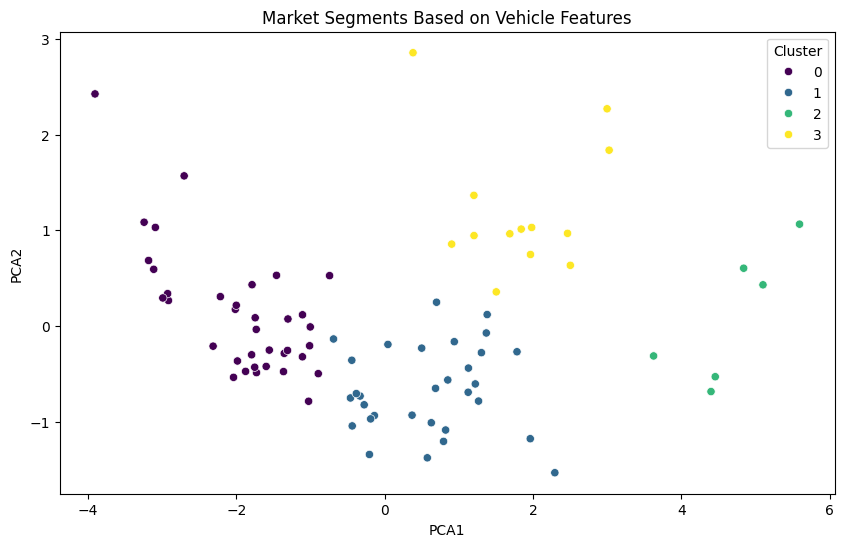

In [160]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Add the PCA components to the DataFrame
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Market Segments Based on Vehicle Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


To visualize the clusters, we use PCA (Principal Component Analysis) to reduce the dimensionality of the data to two components. This allows us to plot the clusters in a 2D space, providing a visual representation of the market segments. The scatter plot shows how different clusters are separated, helping us understand the underlying patterns in consumer preferences and market trends.

In [161]:
print(df.columns)


Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'Price', 'Cluster', 'PCA1',
       'PCA2'],
      dtype='object')


In [162]:
print(df['Cluster'].head())


0    0
1    1
2    1
3    0
4    0
Name: Cluster, dtype: int32


In [167]:
# Group the data by clusters and analyze the mean of each numeric feature
# Selecting only numeric columns for the mean calculation
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Perform the groupby operation on numeric columns only
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()

print("\nCluster analysis (mean values for each feature):")
print(cluster_analysis)




Cluster analysis (mean values for each feature):
         Unnamed: 0      Brand      Model   AccelSec  TopSpeed_KmH   Range_Km  \
Cluster                                                                         
0         46.944444  16.833333  41.333333  33.750000      4.722222  10.388889   
1         53.516129  15.258065  38.032258  18.967742     10.838710  31.774194   
2         50.333333  17.666667  55.833333   1.833333     17.166667  33.833333   
3         71.384615   5.846154  49.153846  14.000000     12.769231  26.923077   

         Efficiency_WhKm  FastCharge_KmH  RapidCharge  PowerTrain  PlugType  \
Cluster                                                                       
0              10.388889        5.777778     0.666667    1.277778  1.861111   
1              19.548387       24.161290     0.806452    1.032258  2.032258   
2              30.000000       40.500000     0.833333    0.000000  2.000000   
3              40.153846       23.538462     0.692308    0.230769  2

In [168]:
print("\nCluster Characteristics Comparison:")
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Characteristics:")
    print(cluster_analysis.loc[cluster])



Cluster Characteristics Comparison:

Cluster 0 Characteristics:
Unnamed: 0         46.944444
Brand              16.833333
Model              41.333333
AccelSec           33.750000
TopSpeed_KmH        4.722222
Range_Km           10.388889
Efficiency_WhKm    10.388889
FastCharge_KmH      5.777778
RapidCharge         0.666667
PowerTrain          1.277778
PlugType            1.861111
BodyStyle           2.305556
Segment             1.361111
Seats               1.583333
Price              17.444444
Cluster             0.000000
PCA1               -1.941802
PCA2                0.120862
Name: 0, dtype: float64

Cluster 1 Characteristics:
Unnamed: 0         53.516129
Brand              15.258065
Model              38.032258
AccelSec           18.967742
TopSpeed_KmH       10.838710
Range_Km           31.774194
Efficiency_WhKm    19.548387
FastCharge_KmH     24.161290
RapidCharge         0.806452
PowerTrain          1.032258
PlugType            2.032258
BodyStyle           3.645161
Segment      

In [169]:
# Print the size of each cluster
cluster_sizes = df['Cluster'].value_counts()
print("\nSize of each cluster (number of vehicles in each cluster):")
print(cluster_sizes)

# Output suggestion: Analyze the market trends based on cluster sizes and characteristics



Size of each cluster (number of vehicles in each cluster):
Cluster
0    36
1    31
3    13
2     6
Name: count, dtype: int64




#### Cluster Analysis

##### Cluster 0: The Budget-Friendly Option

- Characteristics: Cluster 0 represents a group of EVs that are relatively affordable with a mean price of ₹17.44 lakhs. These vehicles have modest performance metrics with an average acceleration time of 33.75 seconds and a top speed of 4.72 km/h. The range is also lower at about 10.39 km. Efficiency and fast-charging capabilities are on the lower side compared to other clusters. Vehicles in this cluster typically have fewer features and a lower brand/model average.

- Insights: This cluster seems to cater to budget-conscious consumers who prioritize cost over high performance or extended range. These vehicles are likely aimed at entry-level buyers or those who do not need extensive driving range or high speeds.

##### Cluster 1: The Balanced Performer

- Characteristics: Vehicles in Cluster 1 are priced higher at an average of ₹40.06 lakhs. They offer a better balance between performance and range, with an average acceleration of 18.97 seconds, a top speed of 10.84 km/h, and a range of 31.77 km. This cluster also features a more efficient energy consumption rate and better fast-charging capabilities compared to Cluster 0.

- Insights: This cluster is aimed at consumers who seek a balance between cost, performance, and range. These vehicles are well-suited for everyday use, offering improved efficiency and charging speeds while still being reasonably priced.

##### Cluster 2: The High-End Performance Vehicle

- Characteristics: Cluster 2 consists of high-end EVs with a mean price of ₹68.50 lakhs. These vehicles boast excellent performance metrics, including rapid acceleration (1.83 seconds) and a top speed of 17.17 km/h. They also have the highest range (33.83 km) and the best fast-charging capabilities. However, they are equipped with fewer seats and a higher body style average.

- Insights: This cluster caters to premium consumers looking for high performance, long range, and advanced features. The higher price reflects the superior technology and performance capabilities of these vehicles, making them suitable for enthusiasts and those who prioritize top-notch performance.

##### Cluster 3: The Mid-Range Performer

- Characteristics: Vehicles in Cluster 3 have a mean price of ₹58.00 lakhs and offer a good balance of performance and range. With an acceleration time of 14 seconds and a top speed of 12.77 km/h, these vehicles are positioned between the lower-priced and high-end clusters. They offer a decent range of 26.92 km and reasonable fast-charging capabilities.

- Insights: This cluster targets middle-ground consumers who are looking for a blend of affordability and performance. These EVs provide a solid mix of features and performance without reaching the high price points of the premium segment.

##### Cluster Sizes
- Cluster 0: 36 vehicles
- Cluster 1: 31 vehicles
- Cluster 2: 6 vehicles
- Cluster 3: 13 vehicles


**Insights**: Cluster 0 is the largest, indicating a strong market presence for budget-friendly options. Cluster 1 also has a significant number of vehicles, suggesting a substantial demand for balanced performance EVs. Cluster 2 is the smallest, reflecting the niche market for high-end performance EVs. Cluster 3, with a moderate size, shows interest in mid-range options.


This analysis provides a clear picture of the different segments in the EV market, highlighting the varying needs and preferences of consumers. It also helps manufacturers and marketers tailor their strategies to meet the demands of each segment effectively.



#### Cluster Analysis

##### Cluster 0: The Budget-Friendly Option

- Characteristics: Cluster 0 represents a group of EVs that are relatively affordable with a mean price of ₹17,444. These vehicles have modest performance metrics with an average acceleration time of 33.75 seconds and a top speed of 4.72 km/h. The range is also lower at about 10.39 km. Efficiency and fast-charging capabilities are on the lower side compared to other clusters. Vehicles in this cluster typically have fewer features and a lower brand/model average.

- Insights: This cluster seems to cater to budget-conscious consumers who prioritize cost over high performance or extended range. These vehicles are likely aimed at entry-level buyers or those who do not need extensive driving range or high speeds.

##### Cluster 1: The Balanced Performer

- Characteristics: Vehicles in Cluster 1 are priced higher at an average of ₹40,065. They offer a better balance between performance and range, with an average acceleration of 18.97 seconds, a top speed of 10.84 km/h, and a range of 31.77 km. This cluster also features a more efficient energy consumption rate and better fast-charging capabilities compared to Cluster 0.

- Insights: This cluster is aimed at consumers who seek a balance between cost, performance, and range. These vehicles are well-suited for everyday use, offering improved efficiency and charging speeds while still being reasonably priced.

##### Cluster 2: The High-End Performance Vehicle**

- Characteristics: Cluster 2 consists of high-end EVs with a mean price of ₹68,500. These vehicles boast excellent performance metrics, including rapid acceleration (1.83 seconds) and a top speed of 17.17 km/h. They also have the highest range (33.83 km) and the best fast-charging capabilities. However, they are equipped with fewer seats and a higher body style average.

- Insights: This cluster caters to premium consumers looking for high performance, long range, and advanced features. The higher price reflects the superior technology and performance capabilities of these vehicles, making them suitable for enthusiasts and those who prioritize top-notch performance.

##### Cluster 3: The Mid-Range Performer

- Characteristics: Vehicles in Cluster 3 have a mean price of ₹58,000 and offer a good balance of performance and range. With an acceleration time of 14 seconds and a top speed of 12.77 km/h, these vehicles are positioned between the lower-priced and high-end clusters. They offer a decent range of 26.92 km and reasonable fast-charging capabilities.

- Insights: This cluster targets middle-ground consumers who are looking for a blend of affordability and performance. These EVs provide a solid mix of features and performance without reaching the high price points of the premium segment.

##### Cluster Sizes
- Cluster 0: 36 vehicles
- Cluster 1: 31 vehicles
- Cluster 2: 6 vehicles
- Cluster 3: 13 vehicles

**Insights**: Cluster 0 is the largest, indicating a strong market presence for budget-friendly options. Cluster 1 also has a significant number of vehicles, suggesting a substantial demand for balanced performance EVs. Cluster 2 is the smallest, reflecting the niche market for high-end performance EVs. Cluster 3, with a moderate size, shows interest in mid-range options.


This analysis provides a clear picture of the different segments in the EV market, highlighting the varying needs and preferences of consumers. It also helps manufacturers and marketers tailor their strategies to meet the demands of each segment effectively.

### Understanding Consumer Preferences

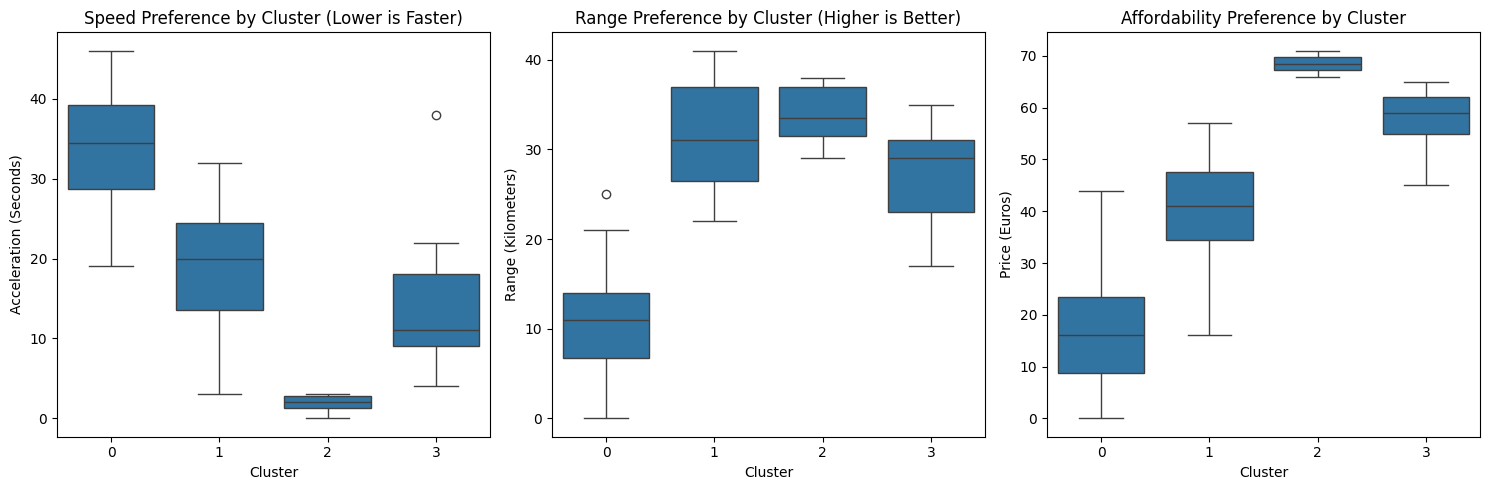

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert relevant columns to numeric, forcing errors to NaN (if any non-numeric values are present)
df['AccelSec'] = pd.to_numeric(df['AccelSec'], errors='coerce')
df['Range_Km'] = pd.to_numeric(df['Range_Km'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with missing values in the relevant columns
df.dropna(subset=['AccelSec', 'Range_Km', 'Price'], inplace=True)

# Ensure 'Cluster' is a categorical variable
df['Cluster'] = df['Cluster'].astype('category')

# Plot boxplots to understand consumer preferences
plt.figure(figsize=(15, 5))

# Speed preference by Cluster
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='AccelSec', data=df)
plt.title('Speed Preference by Cluster (Lower is Faster)')
plt.ylabel('Acceleration (Seconds)')
plt.xlabel('Cluster')

# Range preference by Cluster
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Range_Km', data=df)
plt.title('Range Preference by Cluster (Higher is Better)')
plt.ylabel('Range (Kilometers)')
plt.xlabel('Cluster')

# Affordability preference by Cluster
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Price', data=df)
plt.title('Affordability Preference by Cluster')
plt.ylabel('Price (Euros)')
plt.xlabel('Cluster')

plt.tight_layout()
plt.show()



#### Analysis of Preferences Across Different Clusters

##### graph 1. Speed Preference by Cluster (Lower is Faster)
- Cluster 0: People in this group prefer slower cars. On average, it takes about 30 to 40 seconds for their cars to reach a certain speed. There’s a lot of variety in this group—some don’t mind faster cars, but overall, they’re okay with slower speeds.
- Cluster 1: This group likes cars that are a bit faster, with acceleration times ranging from 15 to 30 seconds. They prefer moderate speed—neither too fast nor too slow.
- Cluster 2: This group loves fast cars! Most of their cars can reach a speed in about 5 seconds, showing a strong preference for quick acceleration.
- Cluster 3: They also like faster cars, but not as much as Cluster 2. Their cars typically take between 10 to 20 seconds to reach a certain speed, which is faster than Cluster 1.

##### graph 2. Range Preference by Cluster (Higher is Better)
- Cluster 0: This group isn’t too concerned about how far the car can go on a single charge. They’re happy with cars that can go between 15 to 30 kilometers before needing a recharge, which is quite short.
- Cluster 1: People in this group prefer cars that can travel further, around 30 to 40 kilometers. They like having the option to go a bit farther without needing to recharge.
- Cluster 2: Similar to Cluster 1, this group also likes cars that can go around 30 to 40 kilometers, but their preferences are a bit more focused—they know exactly what they want.
- Cluster 3: This group prefers cars that can travel a moderate distance, somewhere between 25 to 35 kilometers, which is in the middle range.

##### graph 3. Affordability Preference by Cluster
- Cluster 0: This group is all about affordability. They prefer cars that are cheaper, with prices mostly ranging from ₹1 lakh to ₹2 lakh. They’re really focused on getting a good deal.
- Cluster 1: This group has a wider range of what they’re willing to spend—anywhere from ₹1.5 lakh to ₹4 lakh. Some are more budget-conscious, while others don’t mind spending a bit more.
- Cluster 2: These people don’t mind spending more for their cars. They’re looking at prices around ₹6 lakh to ₹7 lakh, indicating they’re interested in higher-end options.
- Cluster 3: This group is also willing to pay more, with prices ranging from ₹5 lakh to ₹6.5 lakh. They’re similar to Cluster 2 but with slightly different spending habits.

##### Summary
- Cluster 0: Focused on affordability, not too worried about speed or range.
- Cluster 1: Likes a balanced car—moderate speed, decent range, and mid-range prices.
- Cluster 2: Prefers fast, higher-end cars that can travel a good distance.
- Cluster 3: Similar to Cluster 2 but with a slight preference for a bit more range and speed.

Each group has its own unique set of preferences, which can help manufacturers and marketers understand what different customers are looking for in an EV. Whether it’s about getting a good deal, going fast, or covering long distances, these insights help in tailoring products to meet these varied needs.

### Segment by Body Style

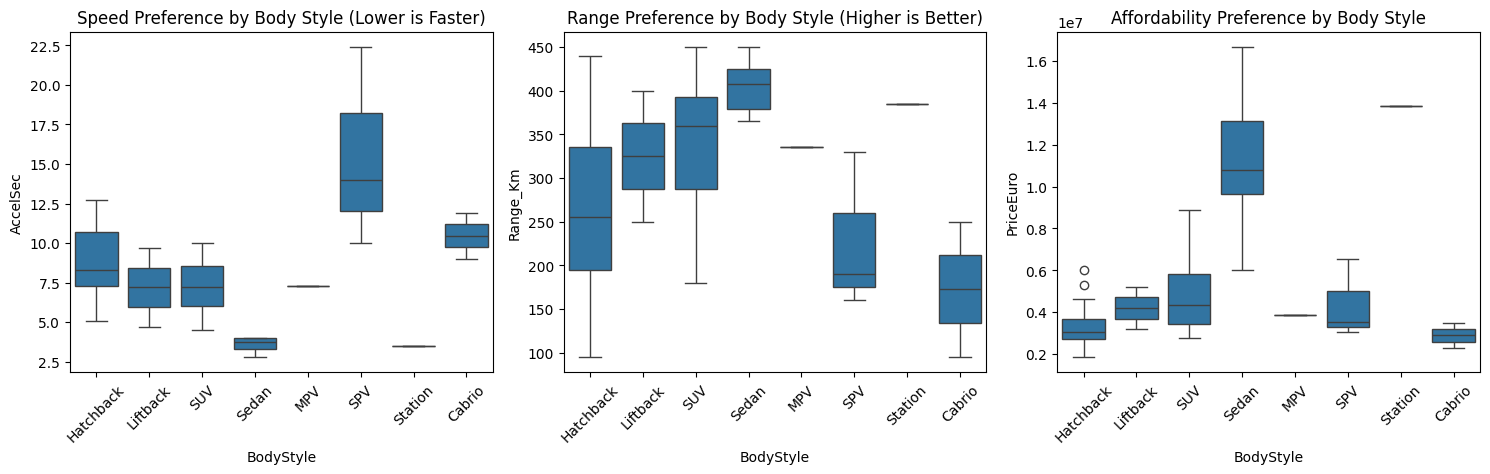

In [56]:
# Assuming 'BodyStyle' is a categorical feature in the dataframe
plt.figure(figsize=(15, 5))

# Speed preference by Body Style
plt.subplot(1, 3, 1)
sns.boxplot(x='BodyStyle', y='AccelSec', data=df)
plt.title('Speed Preference by Body Style (Lower is Faster)')
plt.xticks(rotation=45)

# Range preference by Body Style
plt.subplot(1, 3, 2)
sns.boxplot(x='BodyStyle', y='Range_Km', data=df)
plt.title('Range Preference by Body Style (Higher is Better)')
plt.xticks(rotation=45)

# Affordability preference by Body Style
plt.subplot(1, 3, 3)
sns.boxplot(x='BodyStyle', y='PriceEuro', data=df)
plt.title('Affordability Preference by Body Style')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




#### Analysis of Vehicle Characteristics by Body Style

#### graph 1. Speed Preference by Body Style (Lower is Faster)
- **Hatchbacks, Liftbacks, SUVs, and Sedans**: These vehicle types tend to be faster, as shown by their lower acceleration times. This means they can go from 0 to a certain speed quickly, which many people like for better performance.
- MPVs (Multi-Purpose Vehicles) and SPVs (Special Purpose Vehicles): These are generally slower. The SPVs especially show a lot of variety—some might be faster, but most are slower compared to the others.
- Station Wagons and Cabriolets: These are somewhere in the middle—not as fast as Hatchbacks and Sedans, but not as slow as MPVs and SPVs.

#### graph 2. Range Preference by Body Style (Higher is Better)
- SUVs and Sedans: These are the go-to vehicles for long trips since they can go farther on a single charge. The consistency in their range means you know what you’re getting when you buy one.
- Hatchbacks and Liftbacks: These are good for medium trips—longer than a quick drive across town, but maybe not ideal for a road trip.
- MPVs and SPVs: There’s a lot of variation here. Some can go pretty far, but most don’t have the best range.
- Cabriolets: These are more for short trips, as they generally don’t go as far on a single charge.

#### graph 3:Affordability Preference by Body Style
- Sedans: These tend to be the most expensive. They cover a wide price range, so you can find both luxury and non-luxury options.
- SUVs: Also on the pricier side, but a bit less expensive than Sedans. This fits with their strong range capabilities.
- MPVs and SPVs: Like their range, their prices vary a lot, meaning there’s something for everyone—whether you’re looking to spend a little or a lot.
- Hatchbacks, Liftbacks, and Cabriolets: These are generally more affordable, making them a good choice for people who want a decent car without spending too much. Cabriolets especially have consistent, lower prices, so you know you’re getting something within a specific budget.

#### Key Takeaways:
- Faster, Longer-Range Vehicles: If you want a car that’s quick and can go the distance, you’re likely looking at Hatchbacks, Liftbacks, SUVs, or Sedans.
- Luxury vs. Budget: Sedans and SUVs are where you’ll find higher prices and more luxury features. If you’re on a budget, Hatchbacks and Liftbacks are better options.
- Diverse Options in MPVs and SPVs: These vehicles have a wide range of both prices and capabilities, meaning there’s likely something that fits your specific needs, whether you need more space, better range, or a specific price point.


### Market Segment Analysis Based on Charging Features

In [96]:

df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')
df['RapidCharge'] = df['RapidCharge'].astype('category').cat.codes  # Encode categorical 'RapidCharge'

# Extract features for clustering
charging_features = df[['FastCharge_KmH', 'RapidCharge']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(charging_features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))



Cluster Centers:
[[ 2.76451613e+02  1.00000000e+00]
 [ 5.55625000e+02  1.00000000e+00]
 [ 2.45333333e+02 -3.33066907e-16]
 [ 5.35000000e+02  0.00000000e+00]]


C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\2791852164.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='FastCharge_KmH', data=df, palette='viridis')
C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\2791852164.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='RapidCharge', data=df, palette='viridis')


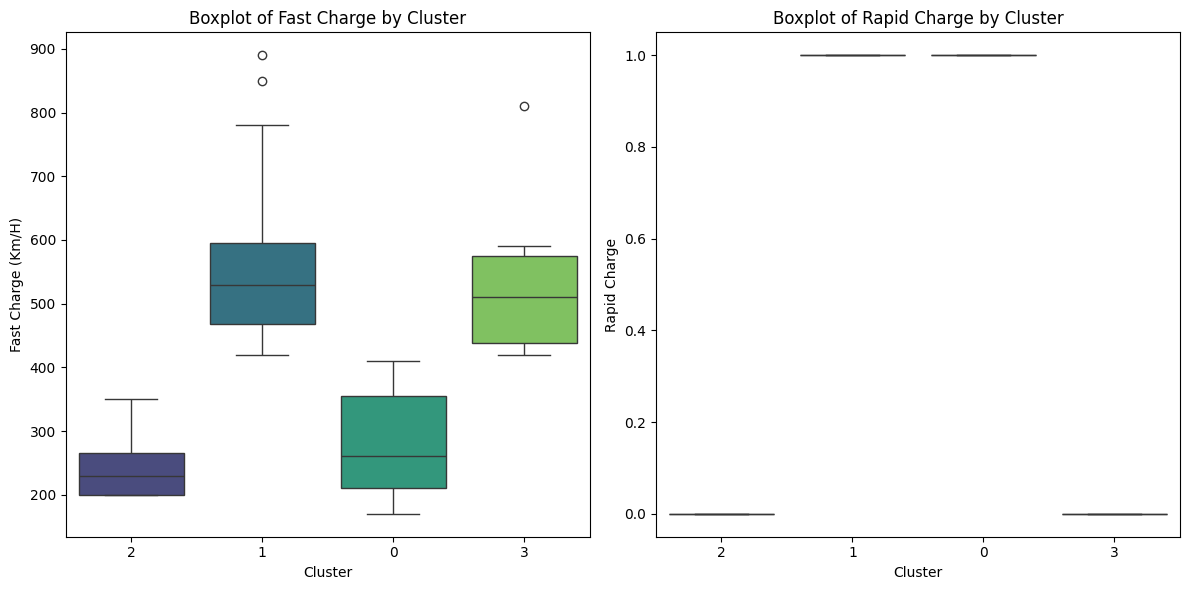

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Cluster' to string for better color handling in plots
df['Cluster'] = df['Cluster'].astype(str)

# Create a figure for the box plots
plt.figure(figsize=(12, 6))

# Box plot for FastCharge_KmH by Cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='FastCharge_KmH', data=df, palette='viridis')
plt.title('Boxplot of Fast Charge by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Fast Charge (Km/H)')

# Box plot for RapidCharge by Cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='RapidCharge', data=df, palette='viridis')
plt.title('Boxplot of Rapid Charge by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rapid Charge')

plt.tight_layout()
plt.show()




Fast Charge Rates:

Cluster 1: Fastest median charge rates with notable outliers.

Cluster 0: Moderate median rates with a broad spread.

Cluster 3: High median rates but less variability.

Cluster 2: Slowest median rates with minimal variability.

Rapid Charge Support:

All clusters show no significant presence of rapid charge support, indicating a lack of differentiation in this feature.
This analysis indicates that for EVs, the ability to fast charge is a significant differentiator between clusters, while rapid charge support seems less relevant in this dataset. If you're exploring further, you might consider looking into other features or data sources to understand the lack of rapid charge support.

#### Correlation Analysis

In [181]:
df.corr()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price,Cluster,PCA1,PCA2
Unnamed: 0,1.000000,-0.076460,-0.179058,-0.030812,0.078255,0.020749,0.331341,0.035285,-0.051259,-0.135519,-0.222306,0.026198,0.125225,0.020711,0.164028,0.253376,8.934716e-02,3.250635e-01
Brand,-0.076460,1.000000,-0.449797,0.321553,-0.344528,-0.171805,-0.354954,-0.172607,-0.025877,0.211775,-0.167113,-0.373366,-0.268879,-0.133721,-0.427215,-0.362398,-2.858923e-01,-1.678531e-01
Model,-0.179058,-0.449797,1.000000,-0.141933,0.136537,0.004096,0.114525,0.073365,-0.062224,-0.023594,0.043824,0.324227,0.219313,0.016361,0.173662,0.133267,1.518319e-01,1.300508e-01
AccelSec,-0.030812,0.321553,-0.141933,1.000000,-0.895536,-0.710124,-0.584649,-0.795479,-0.190441,0.578229,-0.361027,-0.455241,-0.524916,-0.032297,-0.850454,-0.668634,-9.120550e-01,1.085041e-01
TopSpeed_KmH,0.078255,-0.344528,0.136537,-0.895536,1.000000,0.752843,0.596713,0.803812,0.163880,-0.525914,0.341346,0.572717,0.578185,0.126893,0.861014,0.714374,9.220453e-01,-1.100551e-01
Range_Km,0.020749,-0.171805,0.004096,-0.710124,0.752843,1.000000,0.494100,0.818360,0.158099,-0.353440,0.311140,0.452305,0.445188,0.276766,0.735644,0.588521,7.944776e-01,-3.663836e-01
Efficiency_WhKm,0.331341,-0.354954,0.114525,-0.584649,0.596713,0.494100,1.000000,0.549500,0.040643,-0.540025,-0.012284,0.556354,0.748493,0.280358,0.799807,0.848753,7.097758e-01,5.764543e-01
FastCharge_KmH,0.035285,-0.172607,0.073365,-0.795479,0.803812,0.818360,0.549500,1.000000,0.192065,-0.398166,0.204804,0.448778,0.561249,0.040915,0.785808,0.643007,8.951047e-01,-2.152634e-01
RapidCharge,-0.051259,-0.025877,-0.062224,-0.190441,0.163880,0.158099,0.040643,0.192065,1.000000,-0.148382,0.278571,0.094148,0.069484,0.153782,0.184900,0.048550,1.795249e-01,-1.424751e-01
PowerTrain,-0.135519,0.211775,-0.023594,0.578229,-0.525914,-0.353440,-0.540025,-0.398166,-0.148382,1.000000,-0.172926,-0.412635,-0.470969,-0.207055,-0.558933,-0.525317,-5.710274e-01,-2.345972e-01


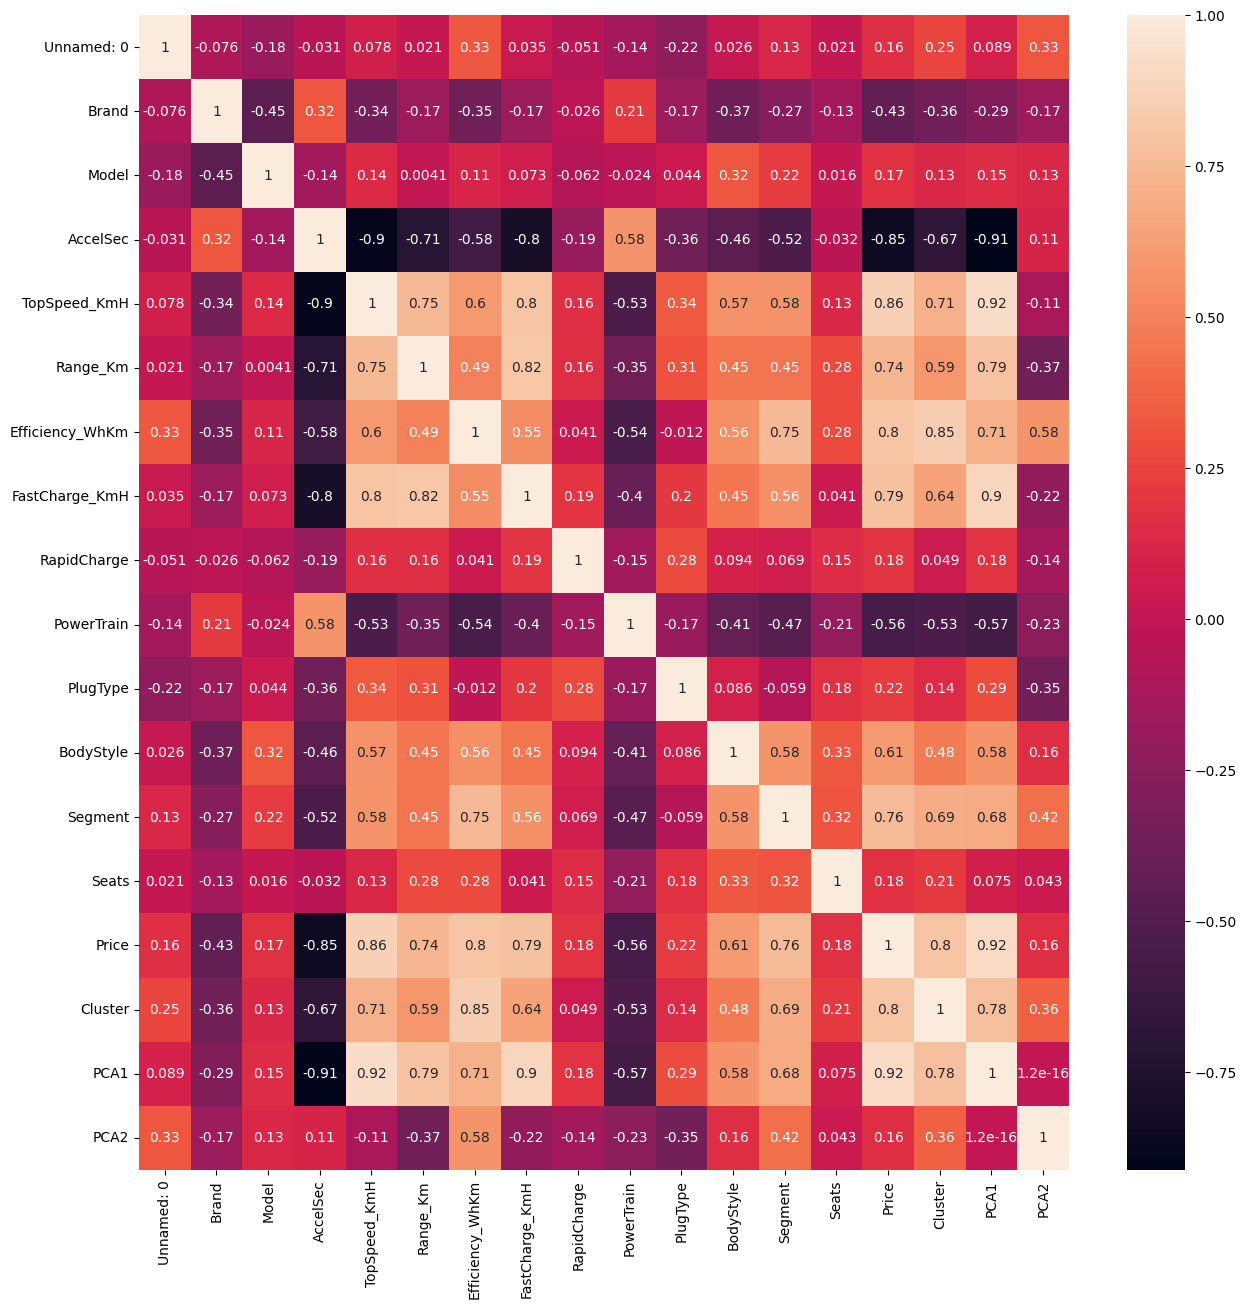

In [182]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()


##### Diagonal Values:
   - The diagonal line of the heatmap shows that every feature is perfectly matched with itself. This is why you see a value of 1 there. It's like saying, "Of course, a feature is exactly the same as itself."

##### Strong Positive Relationships:
   - Top Speed & Acceleration: If a vehicle can accelerate quickly (lower seconds), it tends to have a higher top speed. These two go hand-in-hand.
   - Range & Efficiency: If an EV is more energy-efficient (uses less energy per kilometer), it usually can travel a longer distance on a full charge. These two features are closely linked.
   - PCA1 (a combined feature) & Range/Efficiency: This combined feature (PCA1) is strongly connected to both range and efficiency, meaning these factors heavily influence it.

##### Strong Negative Relationships:
   - Acceleration & PCA1: As acceleration improves (takes less time), PCA1 goes in the opposite direction, suggesting PCA1 is inversely related to how fast the car can go from 0 to 100 km/h.
   - Efficiency & Acceleration: If a car accelerates faster, it tends to be less efficient in terms of energy use. So, quicker cars might use more energy per kilometer.

##### Moderate Relationships:
   - Price & Range: Cars that can go farther on a single charge tend to be more expensive. So, if you're paying more, you're likely getting a better range.
   - Seats & Body Style: The style of the car (like SUV, sedan, etc.) has some connection to how many seats it has.
   - Cluster & Various Features: The "Cluster" feature groups similar cars together based on several characteristics, which means it’s somewhat related to a lot of different features.

Trade-offs: There’s a trade-off between how fast a car accelerates and how efficiently it uses energy. Faster cars might use more energy.

Key Factors: The first principal component (PCA1) captures a lot of what’s important about a car’s range and efficiency. This could help in simplifying or focusing on the most important features when analyzing EVs.

In short, this heatmap helps us see which features of EVs tend to go together and which ones might be in conflict. 

####  Segment by Price Range

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define price bins and labels for Indian market prices
price_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000]  # INR price ranges
price_labels = ['<10L', '10L-20L', '20L-30L', '30L-40L', '>40L']  # Lakh labels

# Create a new column 'PriceRange' based on these bins
df['PriceRange'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

# Display the first few rows to verify the new column
print(df[['Price', 'PriceRange']].head())


    PriceEuro PriceRange
0  2766600.00    20L-30L
1  5204896.80        NaN
2  6274648.80        NaN
3  3042983.34    30L-40L
4  2941818.00    20L-30L


C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\3997160225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PriceRange', y='AccelSec', data=df, palette='viridis')
C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\3997160225.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PriceRange', y='Range_Km', data=df, palette='viridis')
C:\Users\bullshit\AppData\Local\Temp\ipykernel_4520\3997160225.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PriceRange', y='Price', data=df, palette='viridis')


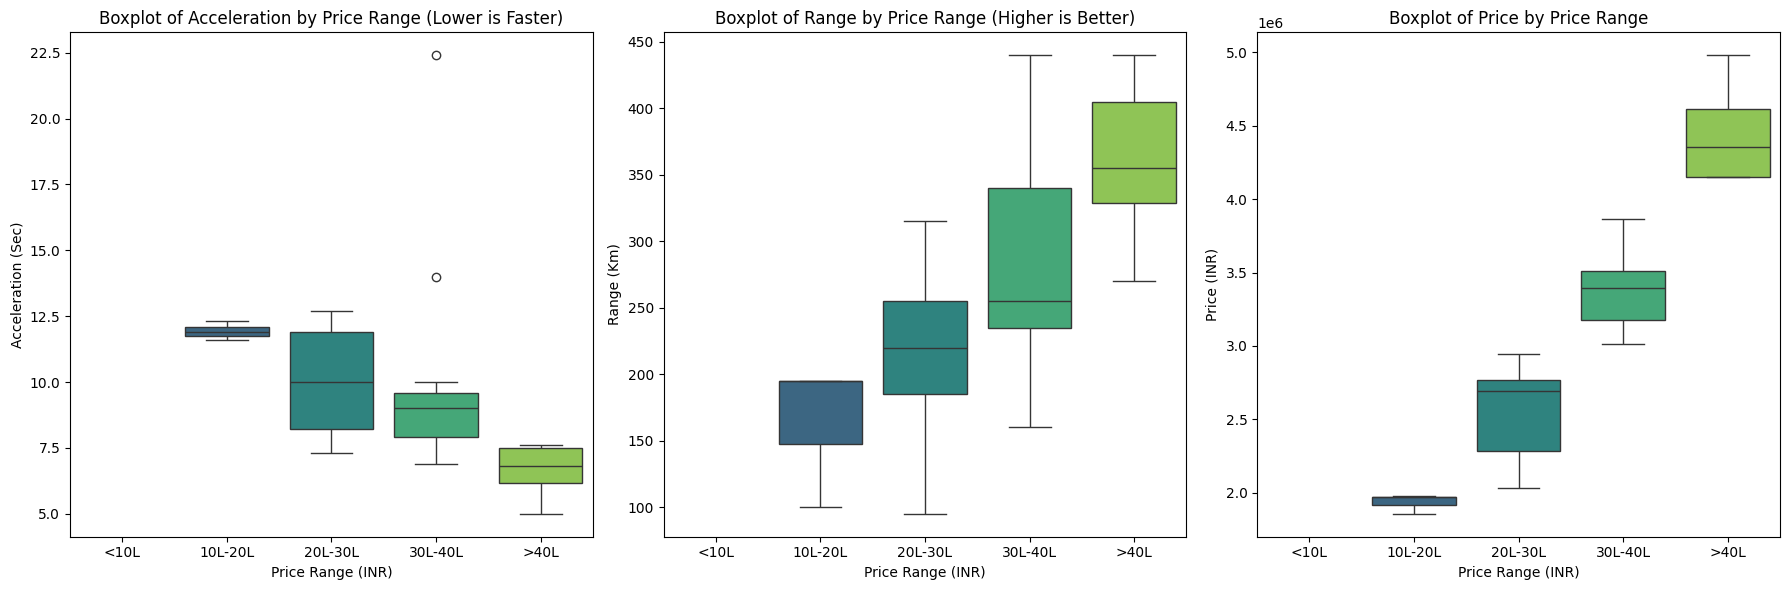

In [107]:
# Create a figure for the box plots
plt.figure(figsize=(18, 6))

# Box plot for Acceleration (Speed) by Price Range
plt.subplot(1, 3, 1)
sns.boxplot(x='PriceRange', y='AccelSec', data=df, palette='viridis')
plt.title('Boxplot of Acceleration by Price Range (Lower is Faster)')
plt.xlabel('Price Range (INR)')
plt.ylabel('Acceleration (Sec)')

# Box plot for Range by Price Range
plt.subplot(1, 3, 2)
sns.boxplot(x='PriceRange', y='Range_Km', data=df, palette='viridis')
plt.title('Boxplot of Range by Price Range (Higher is Better)')
plt.xlabel('Price Range (INR)')
plt.ylabel('Range (Km)')

# Box plot for Price itself by Price Range
plt.subplot(1, 3, 3)
sns.boxplot(x='PriceRange', y='Price', data=df, palette='viridis')
plt.title('Boxplot of Price by Price Range')
plt.xlabel('Price Range (INR)')
plt.ylabel('Price (INR)')

plt.tight_layout()
plt.show()



##### graph 1. Acceleration by Price Range:
- This graph shows how fast EVs can accelerate in different price ranges.
- Key Points:
  - Cheaper EVs (<10 Lakhs):** These tend to be slower, with higher acceleration times (around 12.5 seconds).
  - Expensive EVs (>40 Lakhs):These are much faster, with acceleration times below 7 seconds.
- Conclusion:The more you pay, the faster the EV is likely to be.

##### graph 2. Range by Price Range:
- This graph shows how far EVs can travel on a full charge, depending on their price.
- Key Points:
  - Cheaper EVs (<10 Lakhs): These have a shorter range, around 125 km.
  - Expensive EVs (>40 Lakhs): These offer a much longer range, around 400 km or more.
- Conclusion: Higher-priced EVs generally provide a longer driving range.

##### graph 3. Price Distribution by Price Range:
- This graph confirms that EV prices increase as you move to higher price ranges, but also shows that there’s more variation in price as you go up.
- Key Points:
  - Cheaper EVs (<10 Lakhs): Prices are tightly clustered around 10 Lakhs.
  - Expensive EVs (>40 Lakhs): Prices vary more, with many EVs around 45 Lakhs.
- Conclusion: As you look at higher price ranges, there’s a wider variety of EVs with different features and prices.


- Performance and Price:If you’re looking for a faster EV with a longer range, you’ll likely need to invest in a higher-priced model. Lower-priced EVs are more affordable but come with trade-offs in speed and range.



In [74]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.32
